<a href="https://colab.research.google.com/github/rsidorchuk93/images/blob/main/imageGen_ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Install necessary libraries
!pip install torch torchvision transformers diffusers accelerate segment-anything

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


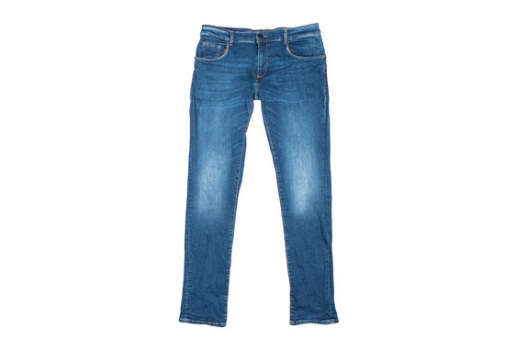

In [2]:
# Load the Image from Google Drive
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the image
image_path = '/content/drive/My Drive/test/image_generation/blue_jeans.jpg'

# Load the image
blue_jeans = Image.open(image_path).convert("RGB")

# Display the image
plt.imshow(blue_jeans)
plt.axis('off')
plt.show()

In [3]:
# Set Hugging Face Token
import os
import numpy as np
hf_token = os.getenv('HF_TOKEN')

In [34]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline

# Load the model
model_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, use_auth_token=hf_token, torch_dtype=torch.float16, low_cpu_mem_usage=True)
pipe = pipe.to("cuda")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Keyword arguments {'use_auth_token': None} are not expected by StableDiffusionImg2ImgPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

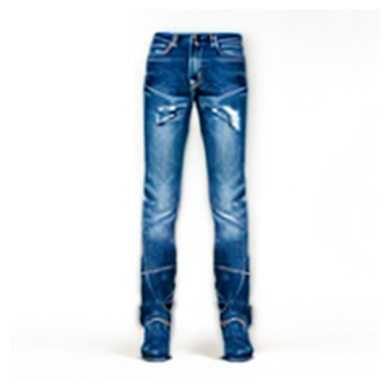

In [44]:
# Resize the image
blue_jeans = blue_jeans.resize((512, 512))

# Convert the PIL image to a NumPy array
blue_jeans_np = np.array(blue_jeans)

# Convert the NumPy array back to a PIL image to ensure compatibility
blue_jeans_pil = Image.fromarray(blue_jeans_np)

# Define the refined prompt for the transformation
prompt = "High quality image of black jeans"

# Generate the new image
result = pipe(prompt=prompt, image=blue_jeans_pil, strength=0.75, guidance_scale=7.5)

# Save and display the result
black_jeans = result.images[0]

# Save the generated image
black_jeans.save("black_jeans.png")

# Display the generated image using matplotlib
plt.imshow(black_jeans)
plt.axis('off')  # Hide the axes
plt.show()